## **Exploratory data analysis (EDA)**

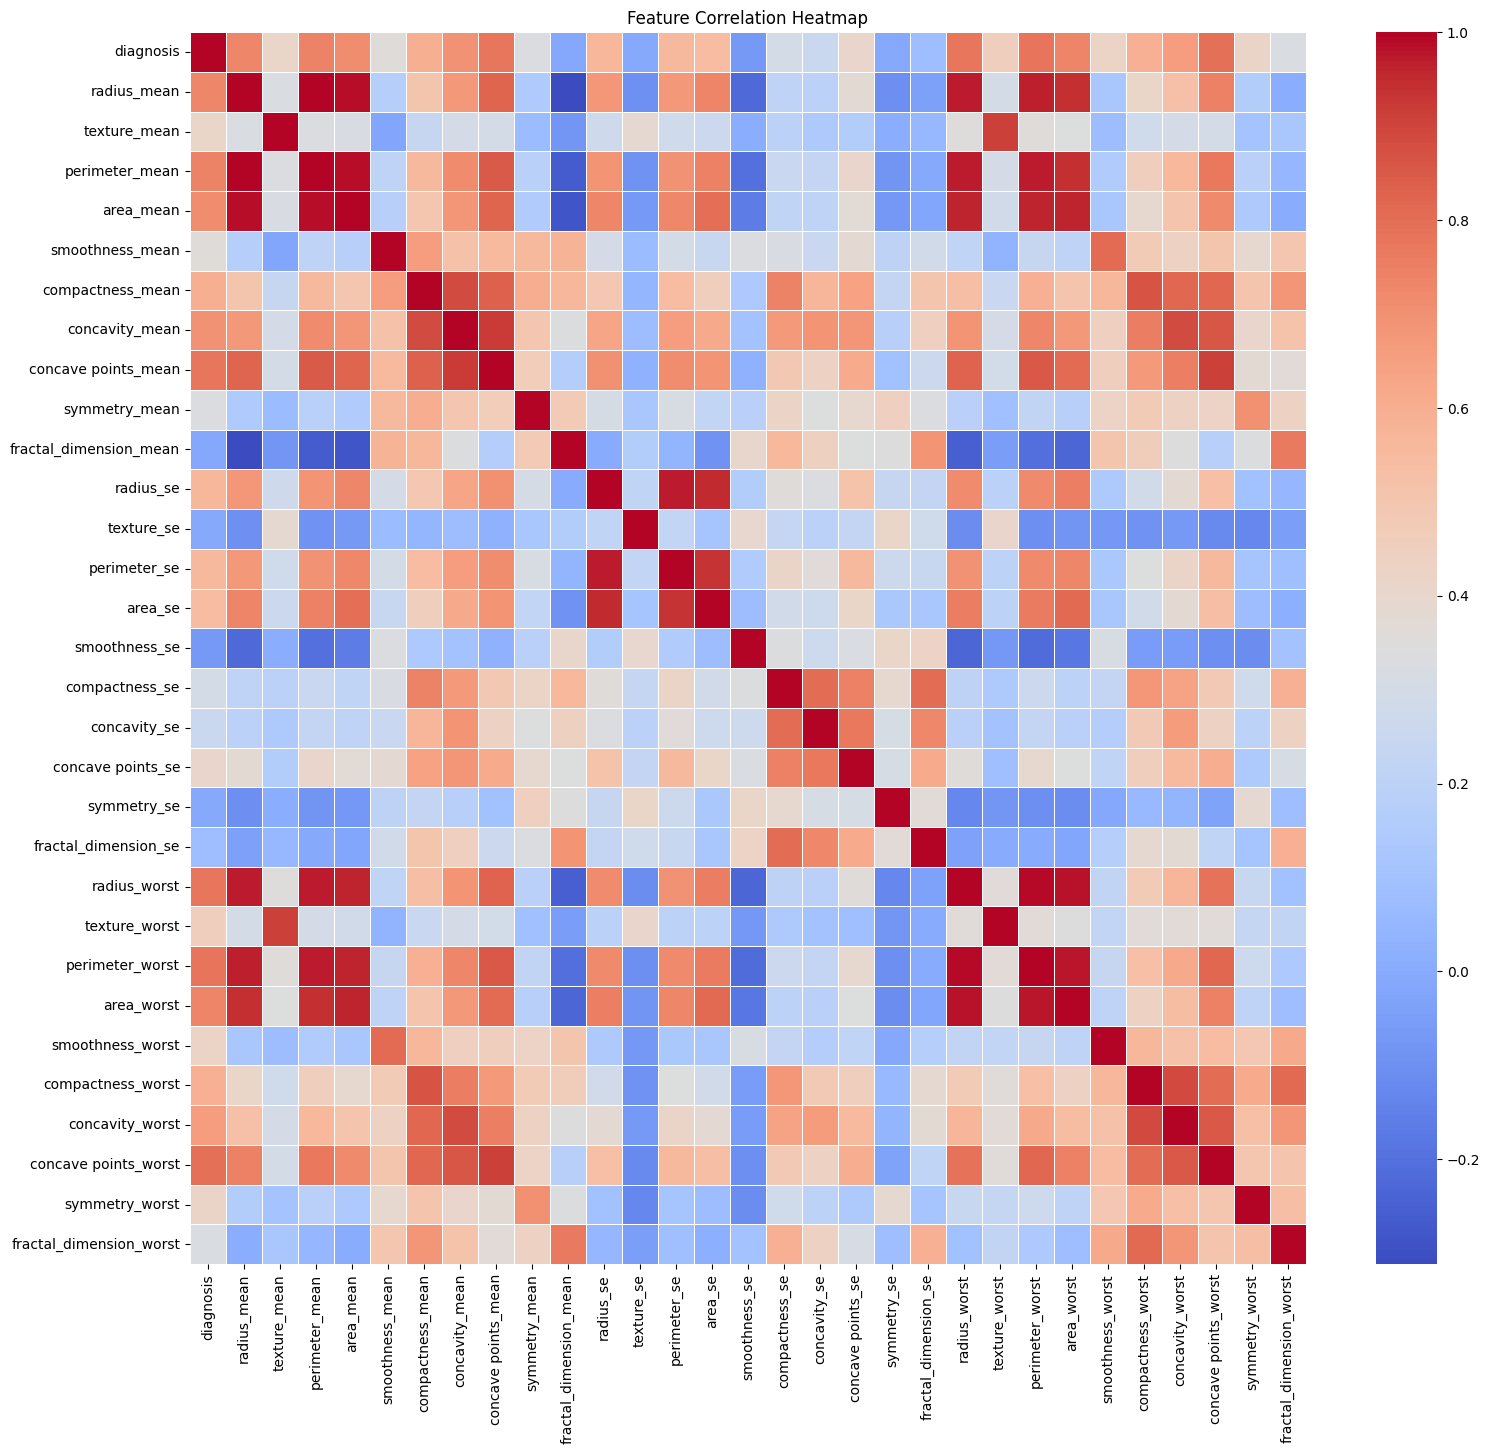

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Veriyi yükle
df = pd.read_csv("data.csv")

# Gereksiz sütunları çıkar
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Hedef değişkeni dönüştür: M (Malignant) -> 1, B (Benign) -> 0
df["diagnosis"] = df["diagnosis"].map({"M": 1, "B": 0})

# Korelasyon matrisini oluştur
correlation_matrix = df.corr()

# Korelasyon ısı haritasını çiz
plt.figure(figsize=(18, 16))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


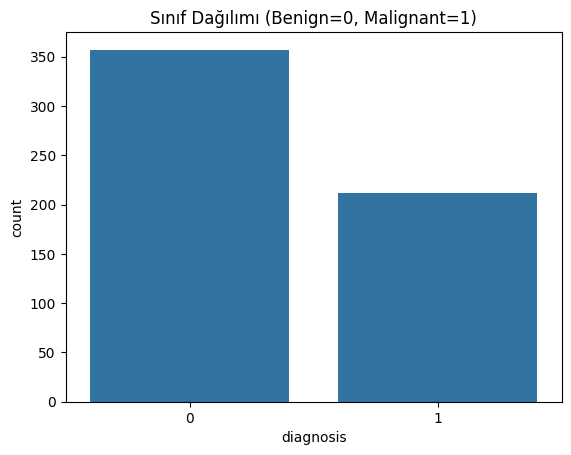

In [4]:
sns.countplot(x='diagnosis', data=df)
plt.title("Sınıf Dağılımı (Benign=0, Malignant=1)")
plt.show()

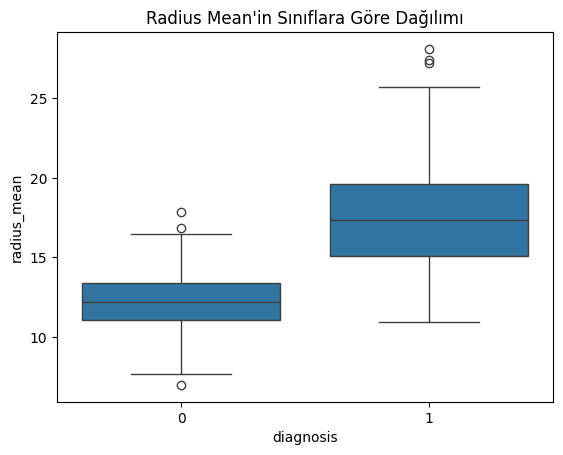

In [5]:
sns.boxplot(x='diagnosis', y='radius_mean', data=df)
plt.title("Radius Mean'in Sınıflara Göre Dağılımı")
plt.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

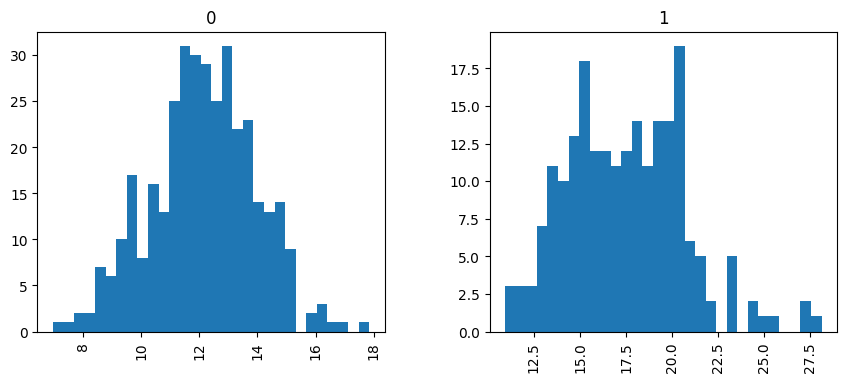

In [6]:
df['radius_mean'].hist(by=df['diagnosis'], bins=30, figsize=(10, 4))

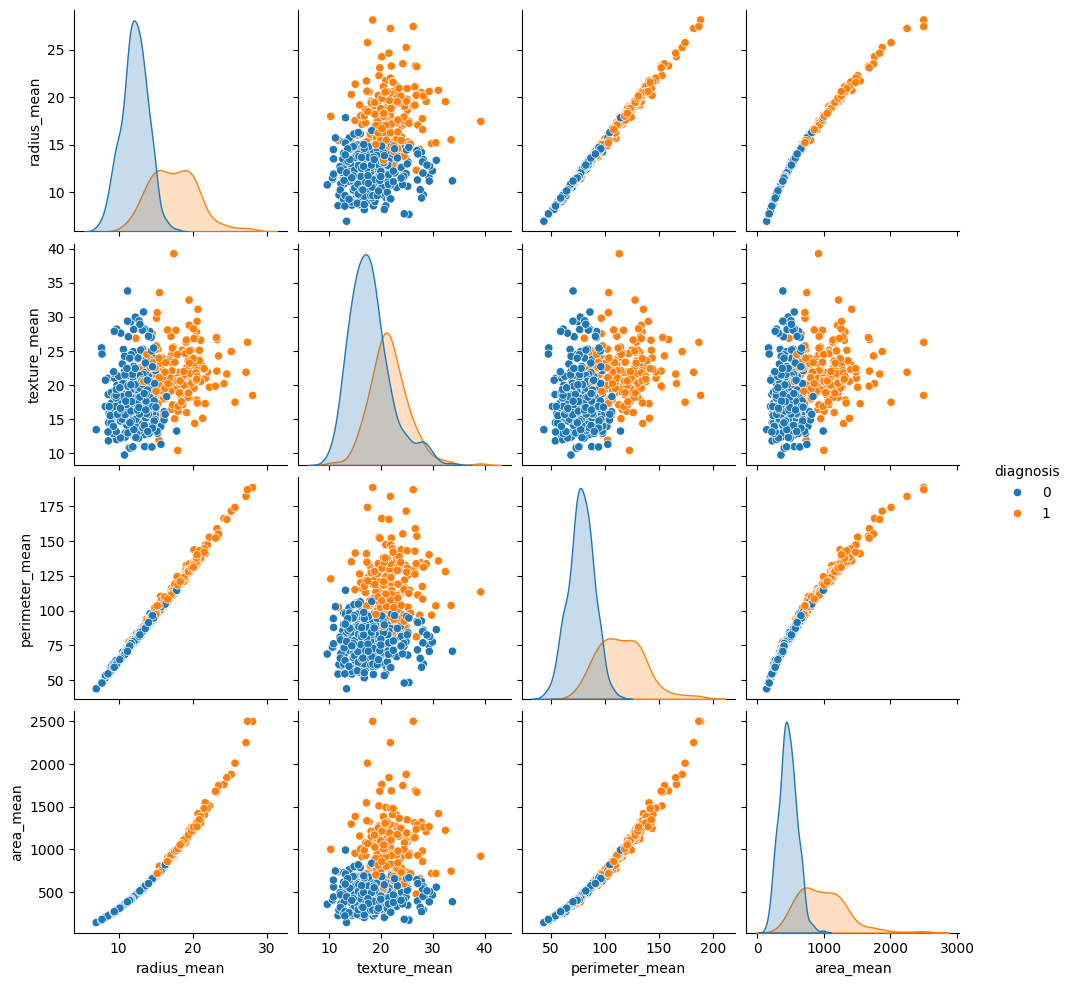

In [7]:
sns.pairplot(df[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']], hue='diagnosis')
plt.show()

In [8]:
df.isnull().sum().sort_values(ascending=False) #Missing value analysis

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


In [9]:
print(df.head(10))

   diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   
5          1        12.45         15.70           82.57      477.1   
6          1        18.25         19.98          119.60     1040.0   
7          1        13.71         20.83           90.20      577.9   
8          1        13.00         21.82           87.50      519.8   
9          1        12.46         24.04           83.97      475.9   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760         0.30010              0.14710   
1          0.08474           0.07864         0.08690              0.07017  

# **CLASSIFICATION ALGORITHMS**

## **LOGISTIC REGRESSION**

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Encode diagnosis: M=1, B=0
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

# Features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Logistic Regression model with L2 regularization
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=10000)

# Cross-validation F1 score
cv_f1_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
print(f"Mean Cross-Validation F1 Score: {cv_f1_scores.mean():.4f}")

# Train-test split for test set evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy and F1 Score on test set
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Accuracy: {acc:.4f}")
print(f"Test Set F1 Score: {f1:.4f}")


Mean Cross-Validation F1 Score: 0.9736
Test Set Accuracy: 0.9737
Test Set F1 Score: 0.9647


# **RANDOM FOREST CLASSIFIER**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Encode diagnosis: M=1, B=0
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

# Features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Scale features (optional for tree-based models but kept for consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Cross-validation F1 score
cv_f1_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
print(f"Mean Cross-Validation F1 Score (Random Forest): {cv_f1_scores.mean():.4f}")

# Train-test split for test set evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy and F1 Score on test set
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Accuracy (Random Forest): {acc:.4f}")
print(f"Test Set F1 Score (Random Forest): {f1:.4f}")


Mean Cross-Validation F1 Score (Random Forest): 0.9380
Test Set Accuracy (Random Forest): 0.9649
Test Set F1 Score (Random Forest): 0.9524


# **Support Vector Machines(SVM)**

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load data
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Encode diagnosis: M=1, B=0
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

# Features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Scale features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SVM Classifier (RBF kernel by default)
model = SVC(kernel='rbf', random_state=42)

# Cross-validation F1 score
cv_f1_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
print(f"Mean Cross-Validation F1 Score (SVM): {cv_f1_scores.mean():.4f}")

# Train-test split for test set evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Accuracy and F1 Score on test set
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Accuracy (SVM): {acc:.4f}")
print(f"Test Set F1 Score (SVM): {f1:.4f}")


Mean Cross-Validation F1 Score (SVM): 0.9642
Test Set Accuracy (SVM): 0.9737
Test Set F1 Score (SVM): 0.9647


# **GRADIENT BOOSTING (XGBOOST)**

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier

# Load data
df = pd.read_csv("data.csv")

# Drop unnecessary columns
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# Encode diagnosis: M=1, B=0
df['diagnosis'] = LabelEncoder().fit_transform(df['diagnosis'])

# Features and target
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

# Scale features (XGBoost doesn't need it, but included for consistency)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# XGBoost Classifier
model = XGBClassifier(eval_metric='logloss', random_state=42)

# Cross-validation F1 score
cv_f1_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='f1')
print(f"Mean Cross-Validation F1 Score (XGBoost): {cv_f1_scores.mean():.4f}")

# Fit and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Test Set Accuracy (XGBoost): {acc:.4f}")
print(f"Test Set F1 Score (XGBoost): {f1:.4f}")


Mean Cross-Validation F1 Score (XGBoost): 0.9642
Test Set Accuracy (XGBoost): 0.9561
Test Set F1 Score (XGBoost): 0.9412


## **NEURAL NETWORKS**

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

# 1. Load and preprocess the data
df = pd.read_csv("data.csv")
df = df.drop(columns=["id", "Unnamed: 32"], errors="ignore")

df["diagnosis"] = LabelEncoder().fit_transform(df["diagnosis"])

X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 2. Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
acc_scores = []
f1_scores = []

# 3. Cross-validation loop
for fold, (train_idx, test_idx) in enumerate(skf.split(X_scaled, y)):
    print(f"\nFold {fold + 1}")

    X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # 4. Build the model
    model = Sequential([
        Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.001)),
        Dropout(0.3),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # 5. Train the model
    model.fit(X_train, y_train,
              validation_split=0.2,
              epochs=100,
              batch_size=16,
              callbacks=[early_stop],
              verbose=0)

    # 6. Evaluate on test fold
    y_pred_probs = model.predict(X_test).ravel()
    y_pred = (y_pred_probs > 0.5).astype(int)

    acc = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    acc_scores.append(acc)
    f1_scores.append(f1)

    print(f"Fold Accuracy: {acc:.4f}")
    print(f"Fold F1 Score: {f1:.4f}")

# 7. Final Results
print("\n=== Final Cross-Validated Results ===")
print(f"Mean Accuracy: {np.mean(acc_scores):.4f} ± {np.std(acc_scores):.4f}")
print(f"Mean F1 Score: {np.mean(f1_scores):.4f} ± {np.std(f1_scores):.4f}")



Fold 1


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Fold Accuracy: 0.9649
Fold F1 Score: 0.9545

Fold 2


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold Accuracy: 0.9649
Fold F1 Score: 0.9512

Fold 3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold Accuracy: 0.9825
Fold F1 Score: 0.9756

Fold 4
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Fold Accuracy: 0.9649
Fold F1 Score: 0.9545

Fold 5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Fold Accuracy: 0.9912
Fold F1 Score: 0.9880

=== Final Cross-Validated Results ===
Mean Accuracy: 0.9737 ± 0.0111
Mean F1 Score: 0.9648 ± 0.0145


In [16]:
import pandas as pd

results = {
    "Model": ["Logistic Regression", "Random Forest", "SVM", "XGBoost", "Neural Network"],
    "Test Set F1 Score": [0.9647, 0.9649, 0.9737, 0.9412, 0.9648],
    "Test Set Accuracy": [0.9737, 0.9524, 0.9647, 0.9561, 0.9737],
    "Std F1 (if known)": ["-", "-", "-", "-", "0.0145"],
    "Std Accuracy (if known)": ["-", "-", "-", "-", "0.0111"]
}

df_results = pd.DataFrame(results)
print(df_results)


                 Model  Test Set F1 Score  Test Set Accuracy  \
0  Logistic Regression             0.9647             0.9737   
1        Random Forest             0.9649             0.9524   
2                  SVM             0.9737             0.9647   
3              XGBoost             0.9412             0.9561   
4       Neural Network             0.9648             0.9737   

  Std F1 (if known) Std Accuracy (if known)  
0                 -                       -  
1                 -                       -  
2                 -                       -  
3                 -                       -  
4            0.0145                  0.0111  


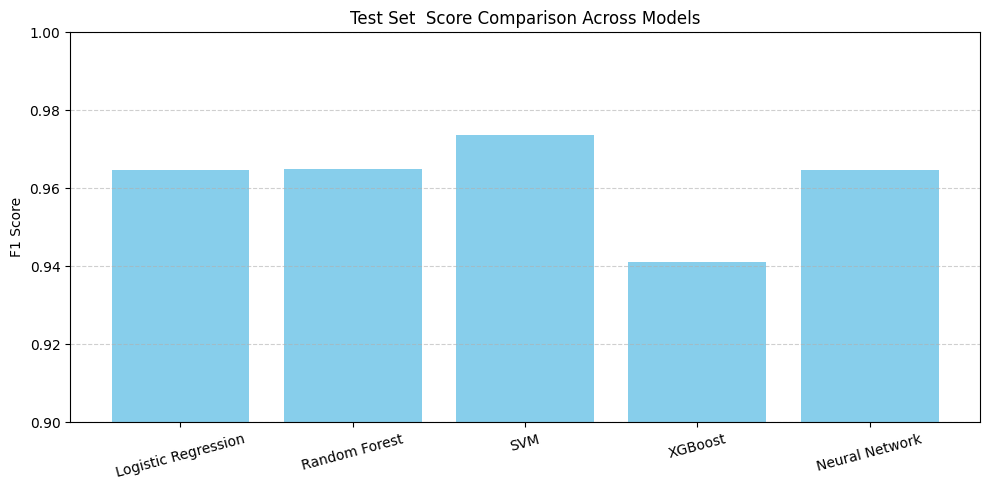

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results["Model"], results["Test Set F1 Score"], color='skyblue')
plt.title("Test Set  Score Comparison Across Models")
plt.ylabel("F1 Score")
plt.ylim(0.9, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


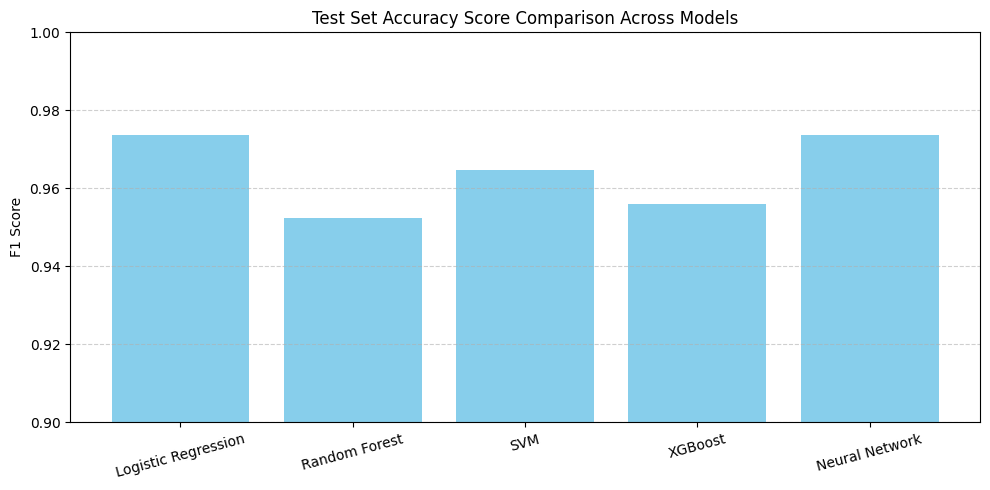

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(results["Model"], results["Test Set Accuracy"], color='skyblue')
plt.title("Test Set Accuracy Score Comparison Across Models")
plt.ylabel("F1 Score")
plt.ylim(0.9, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
